# Notebook 01: Data Cleaning & EDA

## Introduction
- In this notebook, we will perform data cleaning and exploratory data analysis (EDA) on our dataset. The goal is to understand the structure of the data, identify any missing values or outliers, and gain insights that will inform our subsequent analysis

### 1- importing libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


### 2- loading the dataset
- We will load the dataset into a pandas DataFrame and take a look at the first few rows to understand its structure.

In [143]:
df = pd.read_csv(r"d:\my_projcts\job-salary-prediction\data\raw\salaries.csv")

print(df.shape)
(df.columns.tolist())

(151445, 11)


['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

### 3- Dataset sampling
- To make our analysis more manageable, we will take a random sample of the dataset. This will allow us to perform EDA without having to process the entire dataset, which can be time-consuming.

In [144]:
# we take a random sample of the dataset to make our analysis more manageable
df_sample = df.sample(n=50000, random_state=42).reset_index(drop=True)
df_sample.shape # (50000 , 11)


(50000, 11)

### 4- Data Cleaning
- In this step, we will check for missing values, handle duplicates, and perform any necessary data transformations to prepare the dataset for analysis.

In [145]:
display(df_sample.head())
display(df_sample.tail())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Analyst,80000,USD,80000,US,0,US,M
1,2025,MI,FT,Engineer,213000,USD,213000,US,0,US,M
2,2025,MI,FT,Engineer,155000,USD,155000,US,100,US,M
3,2025,SE,FT,Solutions Architect,250000,USD,250000,US,0,US,M
4,2024,SE,FT,Business Intelligence Analyst,104550,USD,104550,US,100,US,M


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
49995,2024,SE,FT,Data Engineer,228800,USD,228800,US,100,US,M
49996,2023,SE,FT,Data Modeler,90700,USD,90700,US,0,US,M
49997,2025,SE,FT,Architect,170000,USD,170000,US,0,US,M
49998,2024,SE,FT,Associate,125000,USD,125000,US,0,US,M
49999,2023,SE,FT,Data Engineer,80000,GBP,98432,GB,0,GB,M


In [146]:
display(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           50000 non-null  int64 
 1   experience_level    50000 non-null  object
 2   employment_type     50000 non-null  object
 3   job_title           50000 non-null  object
 4   salary              50000 non-null  int64 
 5   salary_currency     50000 non-null  object
 6   salary_in_usd       50000 non-null  int64 
 7   employee_residence  50000 non-null  object
 8   remote_ratio        50000 non-null  int64 
 9   company_location    50000 non-null  object
 10  company_size        50000 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.2+ MB


None

In [147]:
display(df_sample.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,50000.0,NaN,NaN,NaN,2024.43592,0.669225,2020.0,2024.0,2025.0,2025.0,2025.0
experience_level,50000,4,SE,29058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,50000,4,FT,49722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,50000,365,Data Scientist,6216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,50000.0,NaN,NaN,NaN,163102.5626,182190.405095,15000.0,106545.0,147900.0,200000.0,15000000.0
salary_currency,50000,20,USD,47241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,50000.0,NaN,NaN,NaN,158217.90828,74284.739261,15000.0,106400.0,147000.0,199500.0,774000.0
employee_residence,50000,84,US,44753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,50000.0,NaN,NaN,NaN,20.942,40.623462,0.0,0.0,0.0,0.0,100.0
company_location,50000,84,US,44767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
print(df_sample.isnull().sum()) # no missing values
print(df_sample.duplicated().sum()) # 18058 duplicate rows

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
18058


In [163]:
df_sample.drop_duplicates(inplace=True)

print(df_sample.duplicated().sum()) # no duplicate rows after dropping duplicates
print(df_sample.shape) # (31942, 11) after dropping duplicates


0
(31942, 11)


### 5- Type conversion
- We will check the data types of each column and convert them to appropriate types if necessary.

In [150]:
df_sample.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [151]:
# Convert columns to proper types
categorical_cols = [
    "experience_level",
    "employment_type",
    "salary_currency",
    "employee_residence",
    "company_location",
    "company_size"
]

text_cols = ["job_title"]

numeric_cols_float = ["salary", "salary_in_usd"]

# Apply conversions
for col in categorical_cols:
    df_sample[col] = df_sample[col].astype("category")

for col in text_cols:
    df_sample[col] = df_sample[col].astype("string")

for col in numeric_cols_float:
    df_sample[col] = df_sample[col].astype(float)

# Verify types
df_sample.dtypes


work_year                      int64
experience_level            category
employment_type             category
job_title             string[python]
salary                       float64
salary_currency             category
salary_in_usd                float64
employee_residence          category
remote_ratio                   int64
company_location            category
company_size                category
dtype: object

### 6- Map codes to meaningful labels
- If there are any columns with coded values, we will map them to meaningful labels for better

In [152]:
# Experience level mapping
exp_map = {"EN": "Entry", "MI": "Mid", "SE": "Senior", "EX": "Executive"}
df_sample["experience_level"] = df_sample["experience_level"].map(exp_map)

# Employment type mapping
emp_map = {"FT": "Full-time", "CT": "Contract", "PT": "Part-time", "FL": "Freelance"}
df_sample["employment_type"] = df_sample["employment_type"].map(emp_map)

# Company size mapping
size_map = {"S": "Small", "M": "Medium", "L": "Large"}
df_sample["company_size"] = df_sample["company_size"].map(size_map)

# Check distributions




In [153]:
for col in ["experience_level", "employment_type", "company_size"]:
    display(df_sample[col].value_counts())

experience_level
Senior       17285
Mid          10168
Entry         3360
Executive     1129
Name: count, dtype: int64

employment_type
Full-time    31677
Contract       142
Part-time      121
Freelance        2
Name: count, dtype: int64

company_size
Medium    31160
Large       702
Small        80
Name: count, dtype: int64

### 7- outlier detection
- We will check for outliers in the numerical columns using box plots and other statistical methods. Outliers can skew our analysis, so we will decide how to handle them based on their impact on the data.

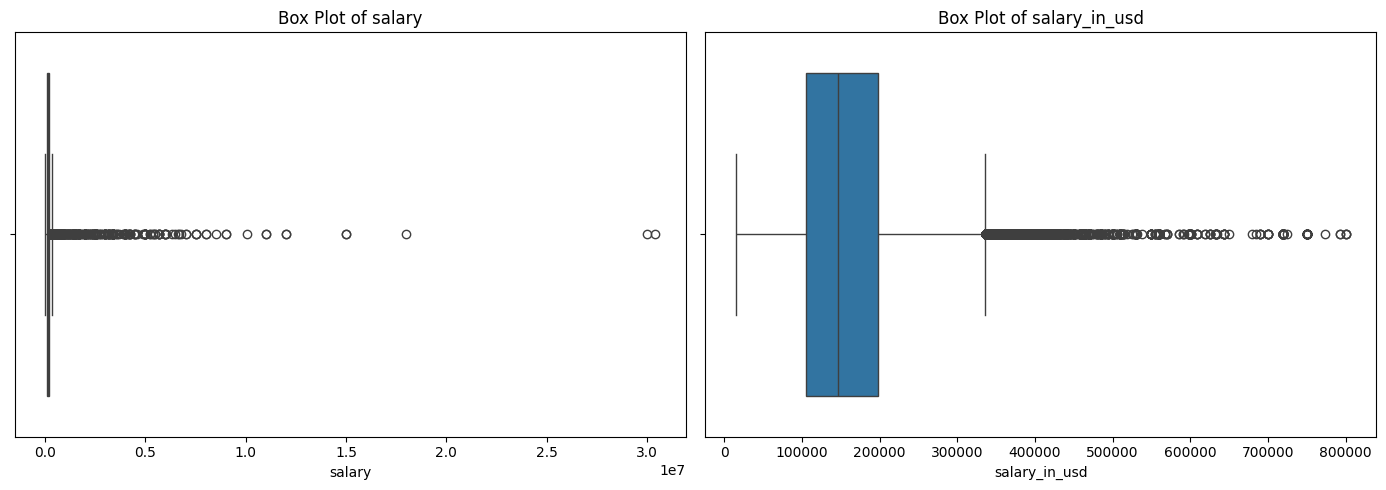

In [154]:
num_cols = ['salary', 'salary_in_usd']

plt.figure(figsize=(14, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [155]:
df_sample.shape

(31942, 11)

In [156]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, lower_bound, upper_bound

for col in ['salary', 'salary_in_usd']:
    outliers, lb, ub = detect_outliers_iqr(df, col)
    
    print(f"📌 {col}")
    print(f"Lower Bound: {lb:,.0f}")
    print(f"Upper Bound: {ub:,.0f}")
    print(f"Number of Outliers: {len(outliers)}")
    print("-" * 50)


📌 salary
Lower Bound: -33,500
Upper Bound: 338,500
Number of Outliers: 3450
--------------------------------------------------
📌 salary_in_usd
Lower Bound: -32,500
Upper Bound: 336,300
Number of Outliers: 3391
--------------------------------------------------


### Handling Outliers in Salary Data

During exploratory analysis, a significant number of salary values were identified as statistical outliers using the IQR method. However, these values were **not removed** from the dataset for the following reasons:

- Salaries are naturally **right-skewed** and follow a heavy-tailed distribution, especially in technical and executive roles.
- High salary values often correspond to **senior, executive, or highly specialized positions**, which are valid and important observations for a salary prediction model.
- Removing these observations would bias the model toward lower and mid-range salaries and reduce its ability to generalize to real-world scenarios.
- In production settings, the model is expected to handle a wide range of salary values, including extreme but realistic cases.

Instead of removing outliers, a **logarithmic transformation** was applied to the target variable (`salary_in_usd`) during the feature engineering step. This approach reduces the influence of extreme values while preserving all data points, resulting in a more stable and robust model.


### 8- Target variable distribution

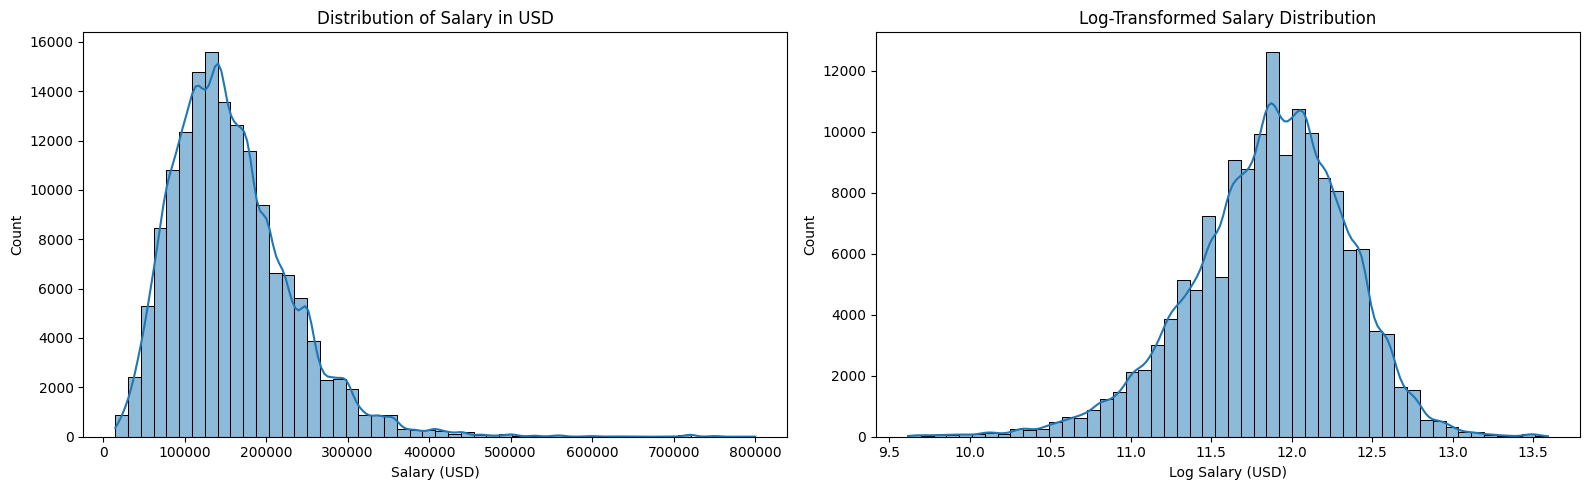

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df['salary_in_usd'], bins=50, kde=True, ax=axes[0]).set(title='Distribution of Salary in USD', xlabel='Salary (USD)')

sns.histplot(np.log1p(df['salary_in_usd']), bins=50, kde=True, ax=axes[1]).set(title='Log-Transformed Salary Distribution', xlabel='Log Salary (USD)')

plt.tight_layout()
plt.show()

### 9- Salary by experience level & employment type

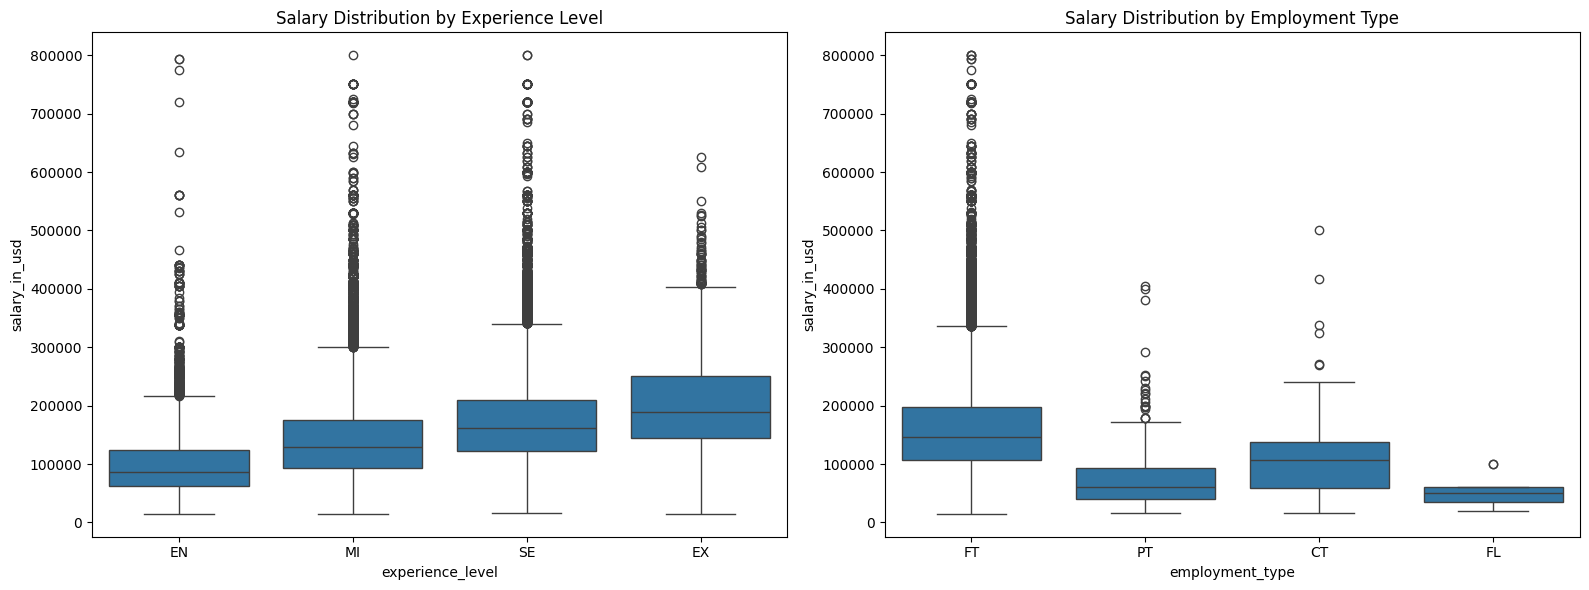

In [158]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot 1: Experience Level (on axes[0])
sns.boxplot(
    x='experience_level', 
    y='salary_in_usd', 
    data=df, 
    order=['EN', 'MI', 'SE', 'EX'], 
    ax=axes[0]
).set(title='Salary Distribution by Experience Level')

# Boxplot 2: Employment Type (on axes[1])
sns.boxplot(
    x='employment_type', 
    y='salary_in_usd', 
    data=df, 
    ax=axes[1]
).set(title='Salary Distribution by Employment Type')

plt.tight_layout()
plt.show()

### 10 - Salary by remote ratio & company size

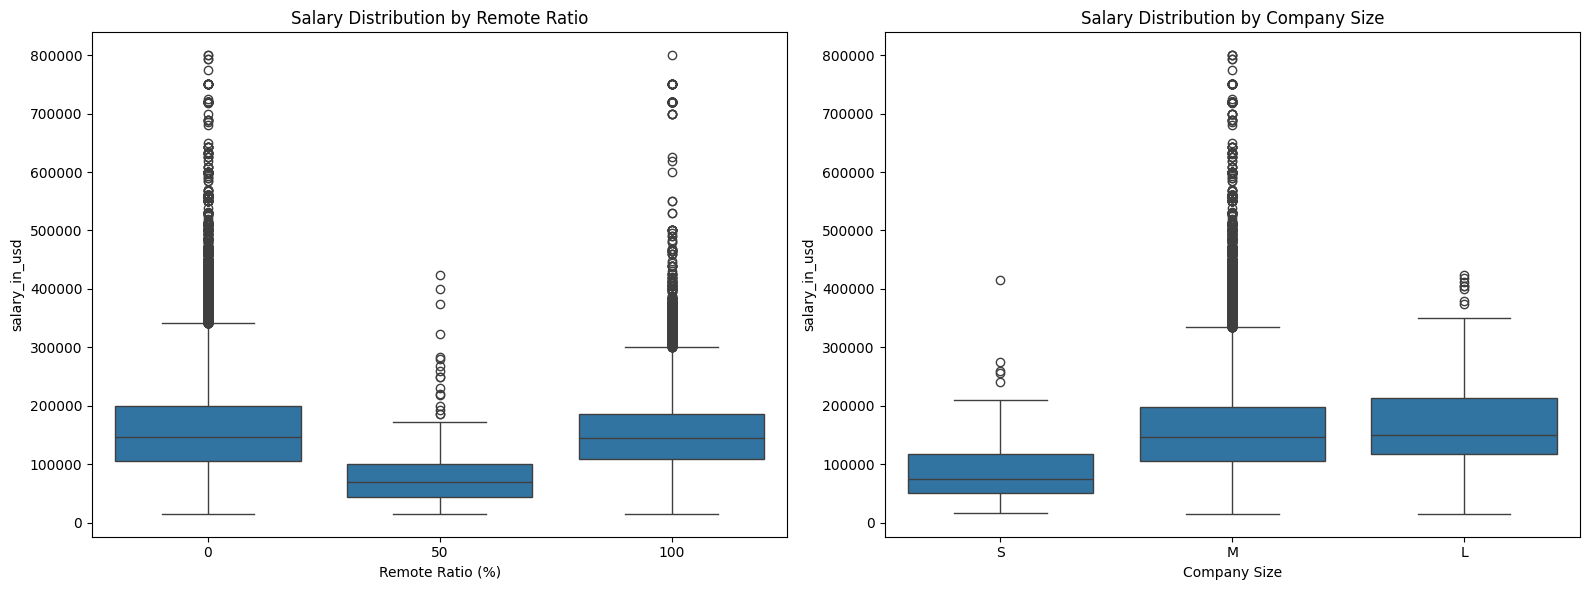

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot 1: Remote Ratio (on axes[0])
sns.boxplot(
    x='remote_ratio', 
    y='salary_in_usd', 
    data=df, 
    ax=axes[0]
).set(title='Salary Distribution by Remote Ratio', xlabel='Remote Ratio (%)')

# Boxplot 2: Company Size (on axes[1])
sns.boxplot(
    x='company_size', 
    y='salary_in_usd', 
    data=df, 
    order=['S', 'M', 'L'], 
    ax=axes[1]
).set(title='Salary Distribution by Company Size', xlabel='Company Size')

plt.tight_layout()
plt.show()

### 11- Top 10 job titles by median salary

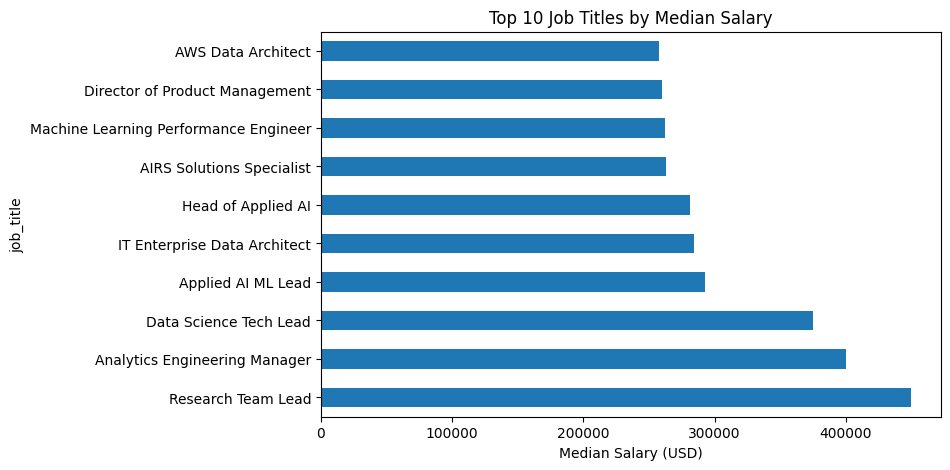

In [160]:
top_jobs = (
    df.groupby('job_title')['salary_in_usd']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

top_jobs.plot(kind='barh', figsize=(8, 5), title='Top 10 Job Titles by Median Salary')
plt.xlabel('Median Salary (USD)')
plt.show()


### 12- Top 10 company locations by median salary

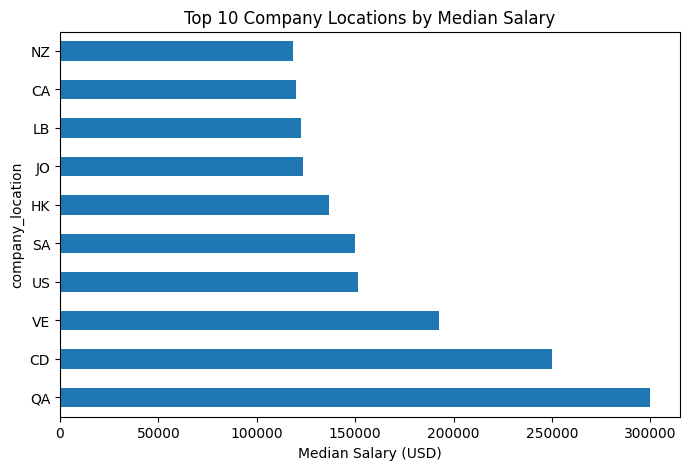

In [161]:
top_countries = (
    df.groupby('company_location')['salary_in_usd']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

top_countries.plot(kind='barh', figsize=(8, 5), title='Top 10 Company Locations by Median Salary')
plt.xlabel('Median Salary (USD)')
plt.show()



### 13 - Correlation check



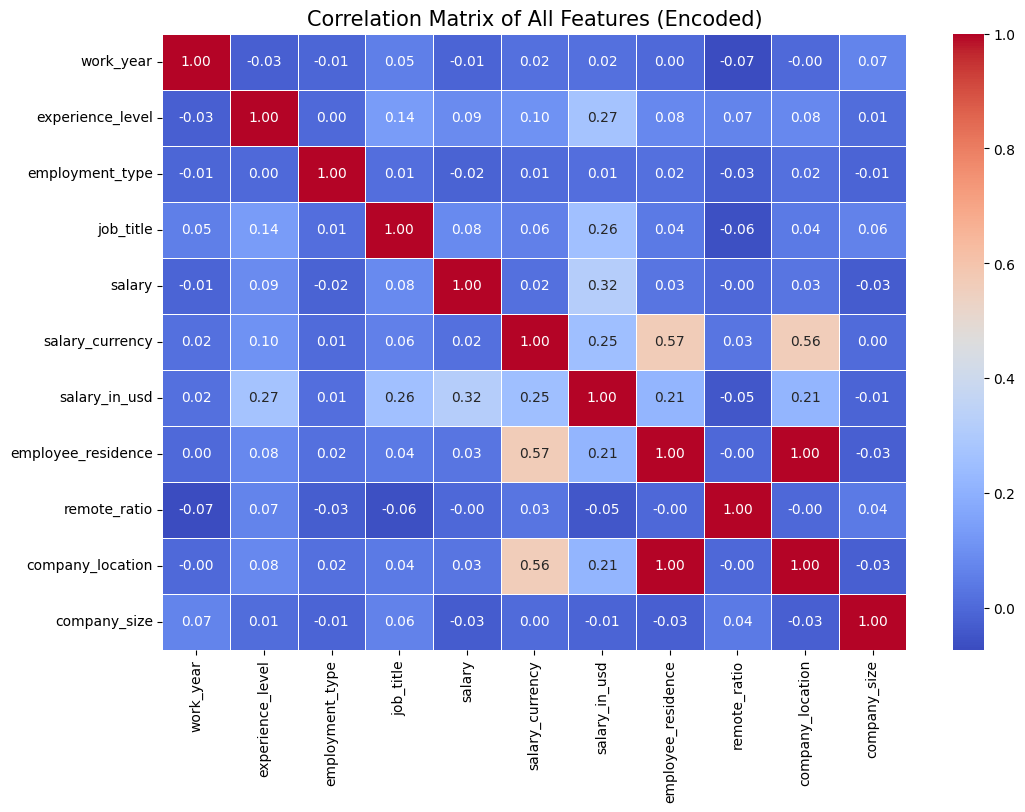

In [162]:
df_numeric = df.copy()
for col in df_numeric.select_dtypes(include=['object', 'category']).columns:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes

plt.figure(figsize=(12, 8))

sns.heatmap(
    df_numeric.corr(), 
    annot=True,          # Shows the correlation numbers
    fmt=".2f",           # Limits decimals to 2
    cmap='coolwarm',     # Red for positive, Blue for negative correlation
    linewidths=0.5
)

plt.title('Correlation Matrix of All Features (Encoded)', fontsize=15)
plt.show()

### 14- Saving the cleaned dataset
- After cleaning and exploring the data, we will save the cleaned dataset to a new CSV file

In [165]:
df_sample.to_csv("../data/processed/eda_cleaned_data.csv", index=False)

## EDA Summary

### Dataset Overview
- **Original data**: 150,000 rows
- **Sampled data**: 50,000 rows
- **After removing duplicates (18,058 rows)**: **31,942 rows, 11 columns**
- **Missing values**: None
- **Data types**: Converted categorical columns to `category` type for efficiency
- The sampled dataset maintains sufficient size and diversity for modeling while reducing computational overhead.

---

### Key Insights

#### 1. Salary Distribution
- **Right-skewed**: Most salaries are below $200,000, with a long tail up to $800,000.
- **Log transformation** normalizes the distribution and will be used for modeling.

#### 2. What Affects Salary?

| Feature | Impact on Salary |
|----------|------------------|
| **Experience Level** | Strong: EX > SE > MI > EN |
| **Job Title** | Very strong: Leadership & AI roles pay highest |
| **Employment Type** | Strong: FT pays significantly more than PT/CT/FL |
| **Company Location** | Strong variation across countries |
| **Remote Ratio** | Weak individual signal |
| **Work Year** | Weak individual correlation |
| **Company Size** | Minimal direct impact |

#### 3. Top 5 Highest Paid Roles
1. Research Team Lead: $420,000  
2. Analytics Engineering Manager: $390,000  
3. Data Science Tech Lead: $380,000  
4. AWS Data Architect: $280,000  
5. Director of Product Management: $270,000  

#### 4. Top 5 Company Locations by Median Salary
1. NZ: ~$275,000  
2. CA: ~$225,000  
3. LB: ~$200,000  
4. JO: ~$200,000  
5. HK: ~$200,000  

*Some smaller countries appear among the top-paying locations, which may be influenced by sample size distribution.*

---

### What This Means for Modeling

**Strong predictive features:**
- ✅ Experience level
- ✅ Job title  
- ✅ Employment type
- ✅ Company location

**Moderate / contextual features:**
- ⚠️ Remote ratio  
- ⚠️ Work year  
- ⚠️ Company size  

While these features showed weaker individual correlation with salary, they may still provide predictive value when combined with other variables in machine learning models.

**Target Transformation:**
- Salary distribution is highly right-skewed.
- A logarithmic transformation of `salary_in_usd` will be used to stabilize variance and improve model performance.
